<a href="https://colab.research.google.com/github/Mickhelgoh/BrainTumor/blob/main/Optimizer%262Model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install  -q kaggle
from google.colab import files
files.upload()

Saving kaggle (1).json to kaggle (1).json


{'kaggle (1).json': b'{"username":"jenyangreyanitif2022","key":"a7d78be444c9b686949fcfcff9909e86"}'}

In [ ]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

cp: cannot stat 'kaggle.json': No such file or directory
chmod: cannot access '/root/.kaggle/kaggle.json': No such file or directory


In [ ]:
import zipfile,os,shutil

In [ ]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

In [ ]:
!kaggle datasets download -d 'sartajbhuvaji/brain-tumor-classification-mri'

Dataset URL: https://www.kaggle.com/datasets/sartajbhuvaji/brain-tumor-classification-mri
License(s): MIT
100% 86.8M/86.8M [00:00<00:00, 248MB/s]
100% 86.8M/86.8M [00:00<00:00, 220MB/s]


In [ ]:
filezip = '/content/brain-tumor-classification-mri.zip'
extraczip = zipfile.ZipFile(filezip,'r')
extraczip.extractall('dataset')

In [ ]:
os.listdir("/content/dataset")

['Training', 'Testing']

In [ ]:

# Corrected indentation
for dirname, _, filenames in os.walk('/content/dataset'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/content/dataset/Training/glioma_tumor/gg (760).jpg
/content/dataset/Training/glioma_tumor/gg (135).jpg
/content/dataset/Training/glioma_tumor/gg (250).jpg
/content/dataset/Training/glioma_tumor/gg (531).jpg
/content/dataset/Training/glioma_tumor/gg (504).jpg
/content/dataset/Training/glioma_tumor/gg (544).jpg
/content/dataset/Training/glioma_tumor/gg (775).jpg
/content/dataset/Training/glioma_tumor/gg (395).jpg
/content/dataset/Training/glioma_tumor/gg (778).jpg
/content/dataset/Training/glioma_tumor/gg (673).jpg
/content/dataset/Training/glioma_tumor/gg (549).jpg
/content/dataset/Training/glioma_tumor/gg (348).jpg
/content/dataset/Training/glioma_tumor/gg (262).jpg
/content/dataset/Training/glioma_tumor/gg (218).jpg
/content/dataset/Training/glioma_tumor/gg (483).jpg
/content/dataset/Training/glioma_tumor/gg (693).jpg
/content/dataset/Training/glioma_tumor/gg (400).jpg
/content/dataset/Training/glioma_tumor/gg (810).jpg
/content/dataset/Training/glioma_tumor/gg (771).jpg
/content/dat

1. SGD eposh 40

100%|██████████| 74/74 [00:00<00:00, 279.21it/s]


Epoch 1/40
92/92 ━━━━━━━━━━━━━━━━━━━━ 0s 769ms/step - accuracy: 0.3412 - loss: 18.2391
Epoch 1: val_accuracy improved from -inf to 0.73089, saving model to model6_best.keras
92/92 ━━━━━━━━━━━━━━━━━━━━ 176s 992ms/step - accuracy: 0.3419 - loss: 18.2352 - val_accuracy: 0.7309 - val_loss: 16.6645 - learning_rate: 0.0010
Epoch 2/40
92/92 ━━━━━━━━━━━━━━━━━━━━ 0s 160ms/step - accuracy: 0.5403 - loss: 17.0864
Epoch 2: val_accuracy did not improve from 0.73089
92/92 ━━━━━━━━━━━━━━━━━━━━ 72s 176ms/step - accuracy: 0.5404 - loss: 17.0844 - val_accuracy: 0.7248 - val_loss: 15.9914 - learning_rate: 0.0010
Epoch 3/40
92/92 ━━━━━━━━━━━━━━━━━━━━ 0s 163ms/step - accuracy: 0.6041 - loss: 16.2570
Epoch 3: val_accuracy improved from 0.73089 to 0.77676, saving model to model6_best.keras
92/92 ━━━━━━━━━━━━━━━━━━━━ 25s 272ms/step - accuracy: 0.6042 - loss: 16.2554 - val_accuracy: 0.7768 - val_loss: 15.3557 - learning_rate: 0.0010
Epoch 4/40
92/92 ━━━━━━━━━━━━━━━━━━━━ 0s 157ms/step - accuracy: 0.6587 - loss:

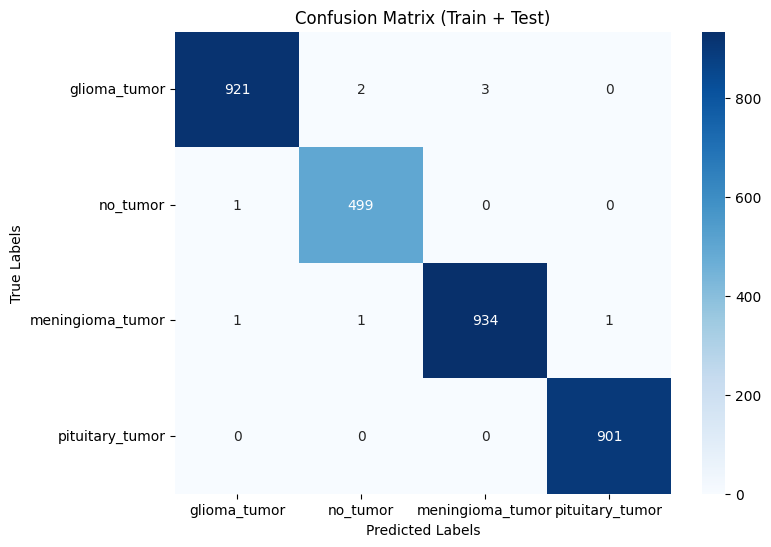

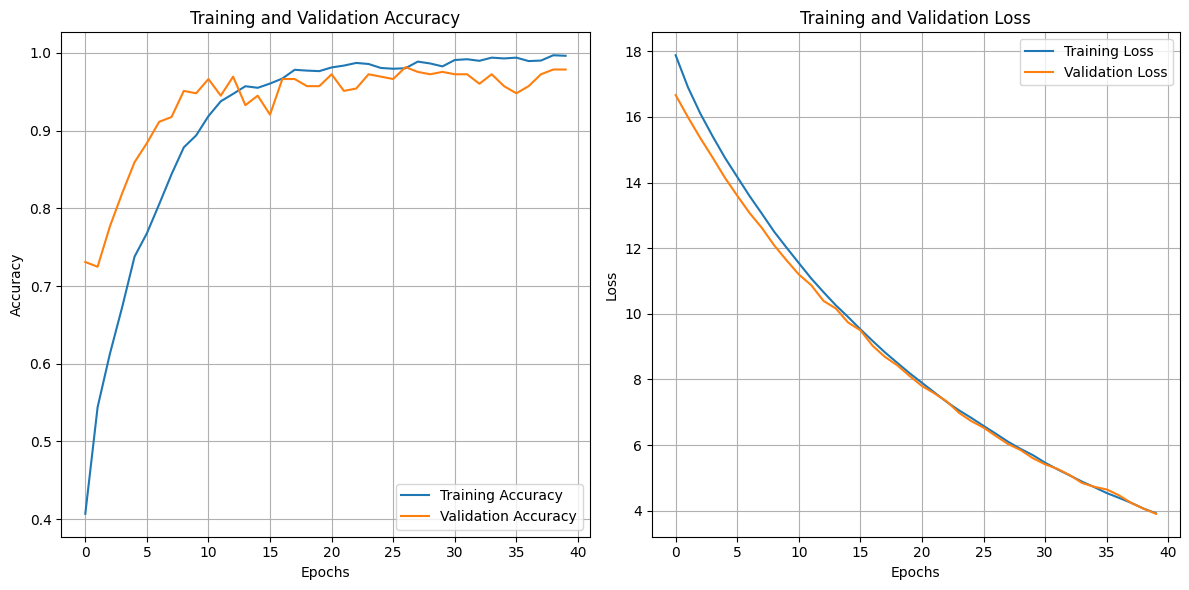

In [ ]:
# Import libraries
from tensorflow.keras.applications import DenseNet121, VGG16
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, Dropout, GlobalAveragePooling2D, Concatenate, BatchNormalization
from tensorflow.keras.optimizers import SGD
from tensorflow.keras.regularizers import l2
import tensorflow as tf
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau, ModelCheckpoint
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.model_selection import train_test_split
import numpy as np
import cv2
import os
from tqdm import tqdm
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Dataset paths
TRAIN_PATH = '/content/dataset/Training'
TEST_PATH = '/content/dataset/Testing'
labels = ['glioma_tumor', 'no_tumor', 'meningioma_tumor', 'pituitary_tumor']
X = []
y = []
image_size = 150

# Load the dataset
for label in labels:
    folder_path = os.path.join(TRAIN_PATH, label)
    for img_file in tqdm(os.listdir(folder_path)):
        img = cv2.imread(os.path.join(folder_path, img_file))
        img = cv2.resize(img, (image_size, image_size))
        X.append(img)
        y.append(label)

for label in labels:
    folder_path = os.path.join(TEST_PATH, label)
    for img_file in tqdm(os.listdir(folder_path)):
        img = cv2.imread(os.path.join(folder_path, img_file))
        img = cv2.resize(img, (image_size, image_size))
        X.append(img)
        y.append(label)

X = np.array(X)
y = np.array(y)

# Convert labels to integers
y = np.array([labels.index(label) for label in y])
y = tf.keras.utils.to_categorical(y)

# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=101)

# Data augmentation
datagen = ImageDataGenerator(
    rotation_range=45,
    width_shift_range=0.2,
    height_shift_range=0.2,
    zoom_range=0.3,
    horizontal_flip=True,
    shear_range=0.3,
    fill_mode='nearest'
)
datagen.fit(X_train)

# Load DenseNet121 and VGG16 base models without top layers
densenet121 = DenseNet121(weights='imagenet', include_top=False, input_shape=(150, 150, 3))
vgg16 = VGG16(weights='imagenet', include_top=False, input_shape=(150, 150, 3))

# Fine-tune some layers of both models (Gradual Unfreezing)
for layer in densenet121.layers[:100]:
    layer.trainable = False
for layer in vgg16.layers[:100]:
    layer.trainable = False

# Extract features from both models
densenet_out = GlobalAveragePooling2D()(densenet121.output)
densenet_out = Dropout(rate=0.5)(densenet_out)  # Increase dropout

vgg_out = GlobalAveragePooling2D()(vgg16.output)
vgg_out = Dropout(rate=0.5)(vgg_out)  # Increase dropout

# Concatenate the outputs of both models
concatenated = Concatenate()([densenet_out, vgg_out])

# Add Dense layers after concatenation with regularization, batch normalization, and dropout
x = Dense(1024, activation="relu", kernel_regularizer=l2(0.01))(concatenated)  # Increased L2 regularization
x = Dropout(0.5)(x)  # Increased dropout
x = BatchNormalization()(x)

x = Dense(256, activation="relu", kernel_regularizer=l2(0.01))(x)  # Increased L2 regularization
x = BatchNormalization()(x)
x = Dropout(0.5)(x)  # Increased dropout

# Output layer with softmax activation (4 classes)
output_layer = Dense(4, activation="softmax")(x)

# Create the final model
model6 = Model(inputs=[densenet121.input, vgg16.input], outputs=output_layer)
# Compile the model with SGD optimizer
model6.compile(
    optimizer=SGD(learning_rate=0.001, momentum=0.9),
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

# Define callbacks
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True, min_delta=0.001)
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.3, patience=3, min_lr=1e-6)
checkpoint = ModelCheckpoint("model6_best.keras", monitor='val_accuracy', save_best_only=True, verbose=1)

# Train the model using the datagen.flow method
history6 = model6.fit(
    x=[X_train, X_train],
    y=y_train,
    validation_data=([X_test, X_test], y_test),
    epochs=40,
    batch_size=32,
    callbacks=[early_stopping, checkpoint, reduce_lr]
)

# Get predictions for both training and testing sets (combined for classification report and confusion matrix)
train_predictions = model6.predict([X_train, X_train])
train_predictions = np.argmax(train_predictions, axis=-1)

train_true_labels = np.argmax(y_train, axis=-1)

test_predictions = model6.predict([X_test, X_test])
test_predictions = np.argmax(test_predictions, axis=-1)

test_true_labels = np.argmax(y_test, axis=-1)
# Combine both the predictions and true labels of training and testing data
combined_predictions = np.concatenate([train_predictions, test_predictions])
combined_true_labels = np.concatenate([train_true_labels, test_true_labels])

# Classification report for the combined data (train + test)
print("Classification Report (Train + Test):")
print(classification_report(combined_true_labels, combined_predictions, target_names=labels))

# Confusion matrix for the combined data (train + test)
cm_combined = confusion_matrix(combined_true_labels, combined_predictions)

# Plot confusion matrix for the combined data
plt.figure(figsize=(8, 6))
sns.heatmap(cm_combined, annot=True, fmt='d', cmap='Blues', xticklabels=labels, yticklabels=labels)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix (Train + Test)')
plt.show()

# Plot training and validation accuracy and loss together
plt.figure(figsize=(12, 6))

# Accuracy plot
plt.subplot(1, 2, 1)
plt.plot(history6.history['accuracy'], label='Training Accuracy')
plt.plot(history6.history['val_accuracy'], label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.grid()

# Loss plot
plt.subplot(1, 2, 2)
plt.plot(history6.history['loss'], label='Training Loss')
plt.plot(history6.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.grid()

plt.tight_layout()
plt.show()

2.RMprop eposh 40

100%|██████████| 74/74 [00:00<00:00, 218.07it/s]


Epoch 1/40
92/92 ━━━━━━━━━━━━━━━━━━━━ 0s 1s/step - accuracy: 0.5095 - loss: 13.9728   
Epoch 1: val_accuracy improved from -inf to 0.14679, saving model to model6_best.keras
92/92 ━━━━━━━━━━━━━━━━━━━━ 248s 1s/step - accuracy: 0.5099 - loss: 13.9378 - val_accuracy: 0.1468 - val_loss: 226.9921 - learning_rate: 0.0010
Epoch 2/40
92/92 ━━━━━━━━━━━━━━━━━━━━ 0s 166ms/step - accuracy: 0.6161 - loss: 5.6386
Epoch 2: val_accuracy did not improve from 0.14679
92/92 ━━━━━━━━━━━━━━━━━━━━ 74s 182ms/step - accuracy: 0.6162 - loss: 5.6357 - val_accuracy: 0.1468 - val_loss: 61.9161 - learning_rate: 0.0010
Epoch 3/40
92/92 ━━━━━━━━━━━━━━━━━━━━ 0s 166ms/step - accuracy: 0.6574 - loss: 4.8961
Epoch 3: val_accuracy improved from 0.14679 to 0.55352, saving model to model6_best.keras
92/92 ━━━━━━━━━━━━━━━━━━━━ 26s 243ms/step - accuracy: 0.6576 - loss: 4.8935 - val_accuracy: 0.5535 - val_loss: 4.2434 - learning_rate: 0.0010
Epoch 4/40
92/92 ━━━━━━━━━━━━━━━━━━━━ 0s 164ms/step - accuracy: 0.7266 - loss: 4.2184

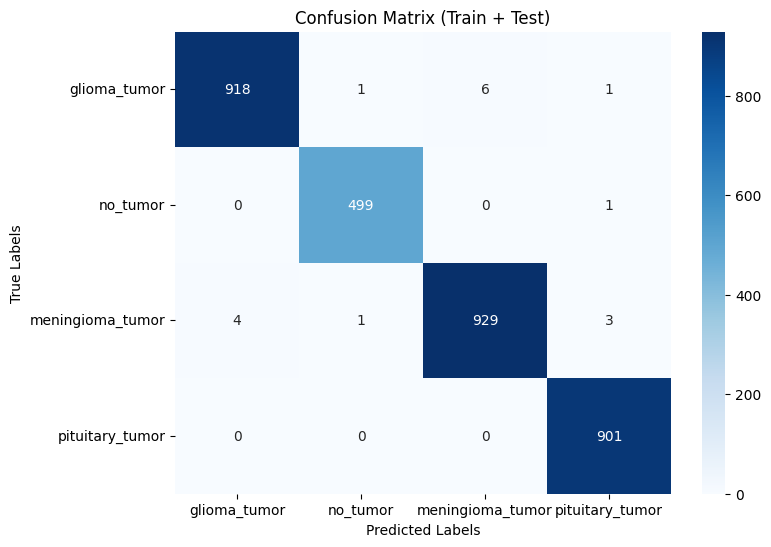

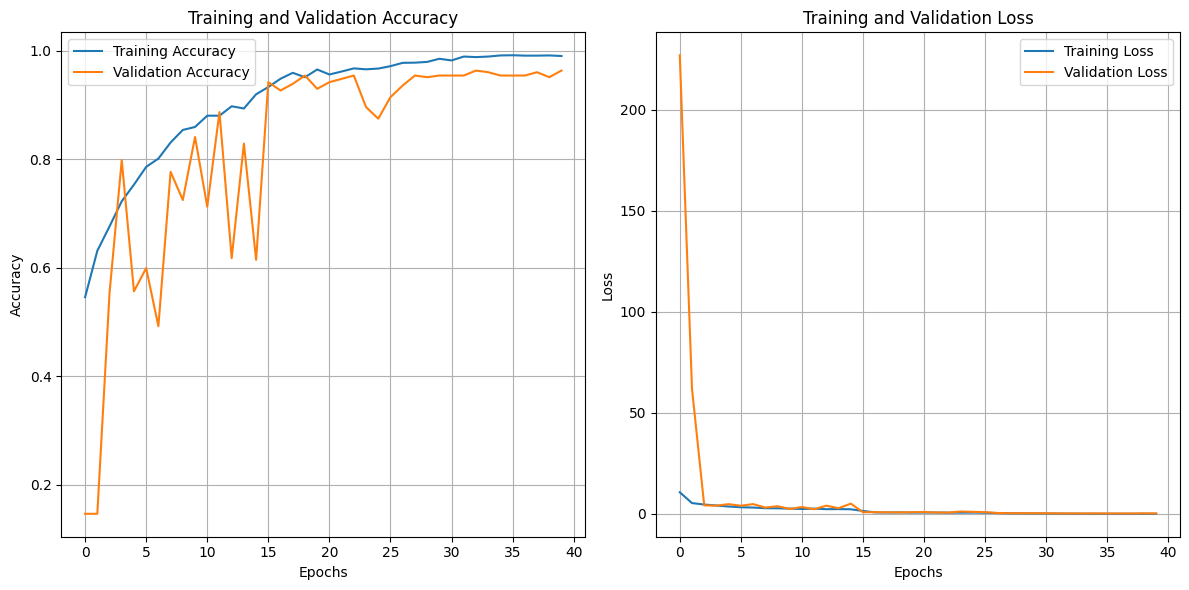

In [ ]:
# Import libraries
from tensorflow.keras.applications import DenseNet121, VGG16
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, Dropout, GlobalAveragePooling2D, Concatenate, BatchNormalization
from tensorflow.keras.optimizers import RMSprop
from tensorflow.keras.regularizers import l2
import tensorflow as tf
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau, ModelCheckpoint
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.model_selection import train_test_split
import numpy as np
import cv2
import os
from tqdm import tqdm
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Dataset paths
TRAIN_PATH = '/content/dataset/Training'
TEST_PATH = '/content/dataset/Testing'
labels = ['glioma_tumor', 'no_tumor', 'meningioma_tumor', 'pituitary_tumor']
X = []
y = []
image_size = 150

# Load the dataset
for label in labels:
    folder_path = os.path.join(TRAIN_PATH, label)
    for img_file in tqdm(os.listdir(folder_path)):
        img = cv2.imread(os.path.join(folder_path, img_file))
        img = cv2.resize(img, (image_size, image_size))
        X.append(img)
        y.append(label)

for label in labels:
    folder_path = os.path.join(TEST_PATH, label)
    for img_file in tqdm(os.listdir(folder_path)):
        img = cv2.imread(os.path.join(folder_path, img_file))
        img = cv2.resize(img, (image_size, image_size))
        X.append(img)
        y.append(label)

X = np.array(X)
y = np.array(y)

# Convert labels to integers
y = np.array([labels.index(label) for label in y])
y = tf.keras.utils.to_categorical(y)

# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=101)

# Data augmentation
datagen = ImageDataGenerator(
    rotation_range=45,
    width_shift_range=0.2,
    height_shift_range=0.2,
    zoom_range=0.3,
    horizontal_flip=True,
    shear_range=0.3,
    fill_mode='nearest'
)
datagen.fit(X_train)

# Load DenseNet121 and VGG16 base models without top layers
densenet121 = DenseNet121(weights='imagenet', include_top=False, input_shape=(150, 150, 3))
vgg16 = VGG16(weights='imagenet', include_top=False, input_shape=(150, 150, 3))

# Fine-tune some layers of both models (Gradual Unfreezing)
for layer in densenet121.layers[:100]:
    layer.trainable = False
for layer in vgg16.layers[:100]:
    layer.trainable = False

# Extract features from both models
densenet_out = GlobalAveragePooling2D()(densenet121.output)
densenet_out = Dropout(rate=0.5)(densenet_out)  # Increase dropout

vgg_out = GlobalAveragePooling2D()(vgg16.output)
vgg_out = Dropout(rate=0.5)(vgg_out)  # Increase dropout

# Concatenate the outputs of both models
concatenated = Concatenate()([densenet_out, vgg_out])

# Add Dense layers after concatenation with regularization, batch normalization, and dropout
x = Dense(1024, activation="relu", kernel_regularizer=l2(0.01))(concatenated)  # Increased L2 regularization
x = Dropout(0.5)(x)  # Increased dropout
x = BatchNormalization()(x)

x = Dense(256, activation="relu", kernel_regularizer=l2(0.01))(x)  # Increased L2 regularization
x = BatchNormalization()(x)
x = Dropout(0.5)(x)  # Increased dropout

# Output layer with softmax activation (4 classes)
output_layer = Dense(4, activation="softmax")(x)

# Create the final model
model6 = Model(inputs=[densenet121.input, vgg16.input], outputs=output_layer)
# Compile the model with SGD optimizer
model6.compile(
    optimizer=RMSprop(learning_rate=0.001, momentum=0.9),
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

# Define callbacks
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True, min_delta=0.001)
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.3, patience=3, min_lr=1e-6)
checkpoint = ModelCheckpoint("model6_best.keras", monitor='val_accuracy', save_best_only=True, verbose=1)

# Train the model using the datagen.flow method
history6 = model6.fit(
    x=[X_train, X_train],
    y=y_train,
    validation_data=([X_test, X_test], y_test),
    epochs=40,
    batch_size=32,
    callbacks=[early_stopping, checkpoint, reduce_lr]
)

# Get predictions for both training and testing sets (combined for classification report and confusion matrix)
train_predictions = model6.predict([X_train, X_train])
train_predictions = np.argmax(train_predictions, axis=-1)

train_true_labels = np.argmax(y_train, axis=-1)

test_predictions = model6.predict([X_test, X_test])
test_predictions = np.argmax(test_predictions, axis=-1)

test_true_labels = np.argmax(y_test, axis=-1)
# Combine both the predictions and true labels of training and testing data
combined_predictions = np.concatenate([train_predictions, test_predictions])
combined_true_labels = np.concatenate([train_true_labels, test_true_labels])

# Classification report for the combined data (train + test)
print("Classification Report (Train + Test):")
print(classification_report(combined_true_labels, combined_predictions, target_names=labels))

# Confusion matrix for the combined data (train + test)
cm_combined = confusion_matrix(combined_true_labels, combined_predictions)

# Plot confusion matrix for the combined data
plt.figure(figsize=(8, 6))
sns.heatmap(cm_combined, annot=True, fmt='d', cmap='Blues', xticklabels=labels, yticklabels=labels)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix (Train + Test)')
plt.show()

# Plot training and validation accuracy and loss together
plt.figure(figsize=(12, 6))

# Accuracy plot
plt.subplot(1, 2, 1)
plt.plot(history6.history['accuracy'], label='Training Accuracy')
plt.plot(history6.history['val_accuracy'], label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.grid()

# Loss plot
plt.subplot(1, 2, 2)
plt.plot(history6.history['loss'], label='Training Loss')
plt.plot(history6.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.grid()

plt.tight_layout()
plt.show()

3.adagrad eposh 40

100%|██████████| 74/74 [00:00<00:00, 250.37it/s]


Epoch 1/40
92/92 ━━━━━━━━━━━━━━━━━━━━ 0s 793ms/step - accuracy: 0.2701 - loss: 18.6660
Epoch 1: val_accuracy improved from -inf to 0.65443, saving model to model6_best.keras
92/92 ━━━━━━━━━━━━━━━━━━━━ 177s 965ms/step - accuracy: 0.2705 - loss: 18.6635 - val_accuracy: 0.6544 - val_loss: 17.1724 - learning_rate: 0.0010
Epoch 2/40
92/92 ━━━━━━━━━━━━━━━━━━━━ 0s 162ms/step - accuracy: 0.3992 - loss: 17.9765
Epoch 2: val_accuracy improved from 0.65443 to 0.71254, saving model to model6_best.keras
92/92 ━━━━━━━━━━━━━━━━━━━━ 76s 196ms/step - accuracy: 0.3992 - loss: 17.9757 - val_accuracy: 0.7125 - val_loss: 16.8576 - learning_rate: 0.0010
Epoch 3/40
92/92 ━━━━━━━━━━━━━━━━━━━━ 0s 162ms/step - accuracy: 0.4431 - loss: 17.6308
Epoch 3: val_accuracy improved from 0.71254 to 0.72171, saving model to model6_best.keras
92/92 ━━━━━━━━━━━━━━━━━━━━ 20s 195ms/step - accuracy: 0.4431 - loss: 17.6304 - val_accuracy: 0.7217 - val_loss: 16.6051 - learning_rate: 0.0010
Epoch 4/40
92/92 ━━━━━━━━━━━━━━━━━━━━ 0

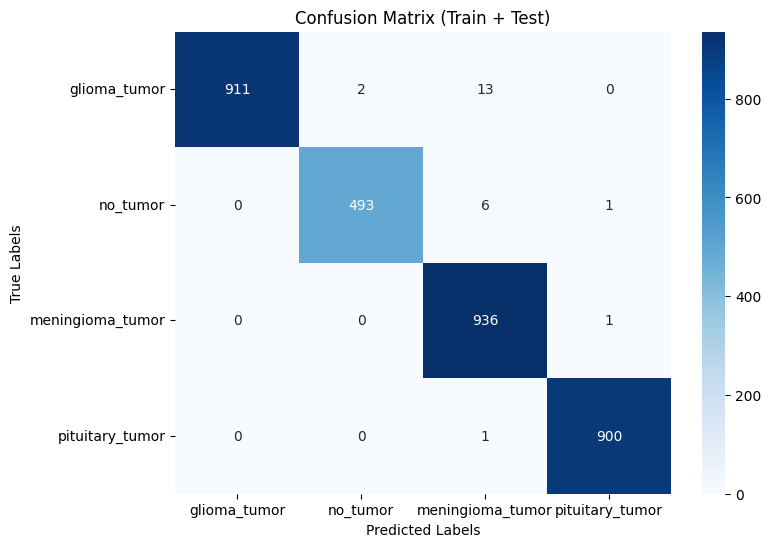

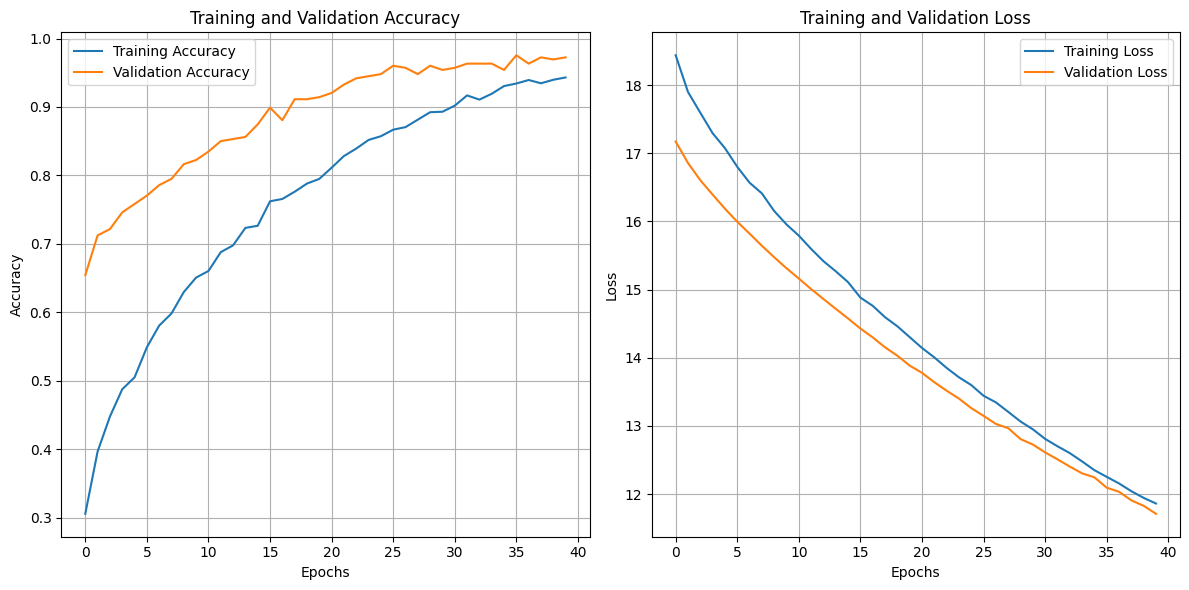

In [ ]:
# Import libraries
from tensorflow.keras.applications import DenseNet121, VGG16
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, Dropout, GlobalAveragePooling2D, Concatenate, BatchNormalization
from tensorflow.keras.optimizers import Adagrad
from tensorflow.keras.regularizers import l2
import tensorflow as tf
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau, ModelCheckpoint
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.model_selection import train_test_split
import numpy as np
import cv2
import os
from tqdm import tqdm
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Dataset paths
TRAIN_PATH = '/content/dataset/Training'
TEST_PATH = '/content/dataset/Testing'
labels = ['glioma_tumor', 'no_tumor', 'meningioma_tumor', 'pituitary_tumor']
X = []
y = []
image_size = 150

# Load the dataset
for label in labels:
    folder_path = os.path.join(TRAIN_PATH, label)
    for img_file in tqdm(os.listdir(folder_path)):
        img = cv2.imread(os.path.join(folder_path, img_file))
        img = cv2.resize(img, (image_size, image_size))
        X.append(img)
        y.append(label)

for label in labels:
    folder_path = os.path.join(TEST_PATH, label)
    for img_file in tqdm(os.listdir(folder_path)):
        img = cv2.imread(os.path.join(folder_path, img_file))
        img = cv2.resize(img, (image_size, image_size))
        X.append(img)
        y.append(label)

X = np.array(X)
y = np.array(y)

# Convert labels to integers
y = np.array([labels.index(label) for label in y])
y = tf.keras.utils.to_categorical(y)

# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=101)

# Data augmentation
datagen = ImageDataGenerator(
    rotation_range=45,
    width_shift_range=0.2,
    height_shift_range=0.2,
    zoom_range=0.3,
    horizontal_flip=True,
    shear_range=0.3,
    fill_mode='nearest'
)
datagen.fit(X_train)

# Load DenseNet121 and VGG16 base models without top layers
densenet121 = DenseNet121(weights='imagenet', include_top=False, input_shape=(150, 150, 3))
vgg16 = VGG16(weights='imagenet', include_top=False, input_shape=(150, 150, 3))

# Fine-tune some layers of both models (Gradual Unfreezing)
for layer in densenet121.layers[:100]:
    layer.trainable = False
for layer in vgg16.layers[:100]:
    layer.trainable = False

# Extract features from both models
densenet_out = GlobalAveragePooling2D()(densenet121.output)
densenet_out = Dropout(rate=0.5)(densenet_out)  # Increase dropout

vgg_out = GlobalAveragePooling2D()(vgg16.output)
vgg_out = Dropout(rate=0.5)(vgg_out)  # Increase dropout

# Concatenate the outputs of both models
concatenated = Concatenate()([densenet_out, vgg_out])

# Add Dense layers after concatenation with regularization, batch normalization, and dropout
x = Dense(1024, activation="relu", kernel_regularizer=l2(0.01))(concatenated)  # Increased L2 regularization
x = Dropout(0.5)(x)  # Increased dropout
x = BatchNormalization()(x)

x = Dense(256, activation="relu", kernel_regularizer=l2(0.01))(x)  # Increased L2 regularization
x = BatchNormalization()(x)
x = Dropout(0.5)(x)  # Increased dropout

# Output layer with softmax activation (4 classes)
output_layer = Dense(4, activation="softmax")(x)

# Create the final model
model6 = Model(inputs=[densenet121.input, vgg16.input], outputs=output_layer)
# Compile the model with SGD optimizer
model6.compile(
    optimizer=Adagrad(learning_rate=0.001),
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

# Define callbacks
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True, min_delta=0.001)
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.3, patience=3, min_lr=1e-6)
checkpoint = ModelCheckpoint("model6_best.keras", monitor='val_accuracy', save_best_only=True, verbose=1)

# Train the model using the datagen.flow method
history6 = model6.fit(
    x=[X_train, X_train],
    y=y_train,
    validation_data=([X_test, X_test], y_test),
    epochs=,
    batch_size=32,
    callbacks=[early_stopping, checkpoint, reduce_lr]
)

# Get predictions for both training and testing sets (combined for classification report and confusion matrix)
train_predictions = model6.predict([X_train, X_train])
train_predictions = np.argmax(train_predictions, axis=-1)

train_true_labels = np.argmax(y_train, axis=-1)

test_predictions = model6.predict([X_test, X_test])
test_predictions = np.argmax(test_predictions, axis=-1)

test_true_labels = np.argmax(y_test, axis=-1)
# Combine both the predictions and true labels of training and testing data
combined_predictions = np.concatenate([train_predictions, test_predictions])
combined_true_labels = np.concatenate([train_true_labels, test_true_labels])

# Classification report for the combined data (train + test)
print("Classification Report (Train + Test):")
print(classification_report(combined_true_labels, combined_predictions, target_names=labels))

# Confusion matrix for the combined data (train + test)
cm_combined = confusion_matrix(combined_true_labels, combined_predictions)

# Plot confusion matrix for the combined data
plt.figure(figsize=(8, 6))
sns.heatmap(cm_combined, annot=True, fmt='d', cmap='Blues', xticklabels=labels, yticklabels=labels)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix (Train + Test)')
plt.show()

# Plot training and validation accuracy and loss together
plt.figure(figsize=(12, 6))

# Accuracy plot
plt.subplot(1, 2, 1)
plt.plot(history6.history['accuracy'], label='Training Accuracy')
plt.plot(history6.history['val_accuracy'], label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.grid()

# Loss plot
plt.subplot(1, 2, 2)
plt.plot(history6.history['loss'], label='Training Loss')
plt.plot(history6.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.grid()

plt.tight_layout()
plt.show()

2. kombinasi VGG16+resnet50

100%|██████████| 74/74 [00:00<00:00, 337.68it/s]


94765736/94765736 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
Epoch 1/40
92/92 ━━━━━━━━━━━━━━━━━━━━ 0s 347ms/step - accuracy: 0.5586 - loss: 16.1987
Epoch 1: val_accuracy improved from -inf to 0.77370, saving model to model_best.keras
92/92 ━━━━━━━━━━━━━━━━━━━━ 94s 602ms/step - accuracy: 0.5597 - loss: 16.1647 - val_accuracy: 0.7737 - val_loss: 21.0468 - learning_rate: 0.0010
Epoch 2/40
92/92 ━━━━━━━━━━━━━━━━━━━━ 0s 165ms/step - accuracy: 0.7997 - loss: 7.1161
Epoch 2: val_accuracy improved from 0.77370 to 0.85627, saving model to model_best.keras
92/92 ━━━━━━━━━━━━━━━━━━━━ 32s 255ms/step - accuracy: 0.7998 - loss: 7.1069 - val_accuracy: 0.8563 - val_loss: 5.4925 - learning_rate: 0.0010
Epoch 3/40
92/92 ━━━━━━━━━━━━━━━━━━━━ 0s 174ms/step - accuracy: 0.8863 - loss: 4.2596
Epoch 3: val_accuracy improved from 0.85627 to 0.90214, saving model to model_best.keras
92/92 ━━━━━━━━━━━━━━━━━━━━ 21s 231ms/step - accuracy: 0.8862 - loss: 4.2558 - val_accuracy: 0.9021 - val_loss: 3.3940 - learning_rate: 0.001

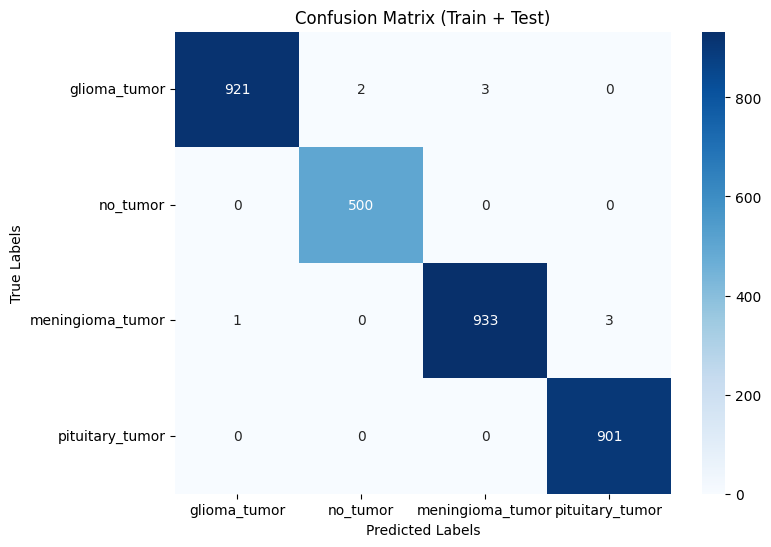

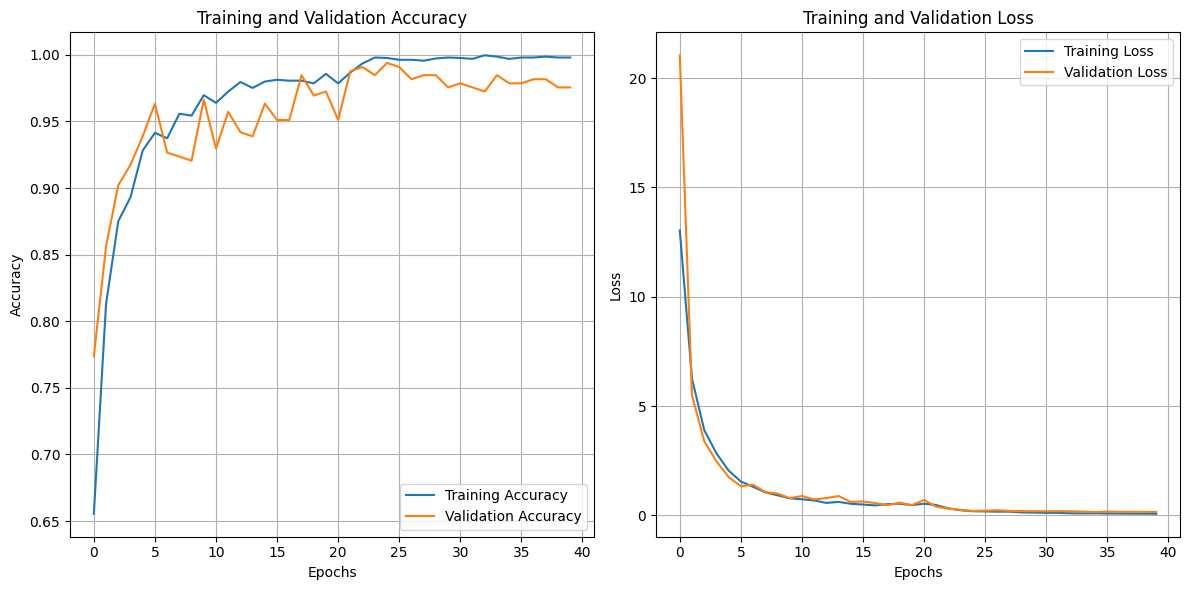

In [ ]:
# Import libraries
from tensorflow.keras.applications import VGG16, ResNet50
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, Dropout, GlobalAveragePooling2D, Concatenate, BatchNormalization
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.regularizers import l2
import tensorflow as tf
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau, ModelCheckpoint
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.model_selection import train_test_split
import numpy as np
import cv2
import os
from tqdm import tqdm
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Dataset paths
TRAIN_PATH = '/content/dataset/Training'
TEST_PATH = '/content/dataset/Testing'
labels = ['glioma_tumor', 'no_tumor', 'meningioma_tumor', 'pituitary_tumor']
X = []
y = []
image_size = 150

# Load the dataset
for label in labels:
    folder_path = os.path.join(TRAIN_PATH, label)
    for img_file in tqdm(os.listdir(folder_path)):
        img = cv2.imread(os.path.join(folder_path, img_file))
        img = cv2.resize(img, (image_size, image_size))
        X.append(img)
        y.append(label)

for label in labels:
    folder_path = os.path.join(TEST_PATH, label)
    for img_file in tqdm(os.listdir(folder_path)):
        img = cv2.imread(os.path.join(folder_path, img_file))
        img = cv2.resize(img, (image_size, image_size))
        X.append(img)
        y.append(label)

X = np.array(X)
y = np.array(y)

# Convert labels to integers
y = np.array([labels.index(label) for label in y])
y = tf.keras.utils.to_categorical(y)

# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=101)

# Data augmentation
datagen = ImageDataGenerator(
    rotation_range=45,
    width_shift_range=0.2,
    height_shift_range=0.2,
    zoom_range=0.3,
    horizontal_flip=True,
    shear_range=0.3,
    fill_mode='nearest'
)
datagen.fit(X_train)

# Load VGG16 and ResNet50 base models without top layers
vgg16 = VGG16(weights='imagenet', include_top=False, input_shape=(150, 150, 3))
resnet50 = ResNet50(weights='imagenet', include_top=False, input_shape=(150, 150, 3))

# Fine-tune some layers of both models (Gradual Unfreezing)
for layer in vgg16.layers[:100]:
    layer.trainable = False
for layer in resnet50.layers[:100]:
    layer.trainable = False

# Extract features from both models
vgg_out = GlobalAveragePooling2D()(vgg16.output)
vgg_out = Dropout(rate=0.5)(vgg_out)  # Increase dropout

resnet_out = GlobalAveragePooling2D()(resnet50.output)
resnet_out = Dropout(rate=0.5)(resnet_out)  # Increase dropout

# Concatenate the outputs of both models
concatenated = Concatenate()([vgg_out, resnet_out])

# Add Dense layers after concatenation with regularization, batch normalization, and dropout
x = Dense(1024, activation="relu", kernel_regularizer=l2(0.01))(concatenated)  # Increased L2 regularization
x = Dropout(0.5)(x)  # Increased dropout
x = BatchNormalization()(x)

x = Dense(256, activation="relu", kernel_regularizer=l2(0.01))(x)  # Increased L2 regularization
x = BatchNormalization()(x)
x = Dropout(0.5)(x)  # Increased dropout

# Output layer with softmax activation (4 classes)
output_layer = Dense(4, activation="softmax")(x)

# Create the final model
model = Model(inputs=[vgg16.input, resnet50.input], outputs=output_layer)

# Compile the model with Adam optimizer
model.compile(
    optimizer=Adam(learning_rate=0.001),
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

# Define callbacks
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True, min_delta=0.001)
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.3, patience=3, min_lr=1e-6)
checkpoint = ModelCheckpoint("model_best.keras", monitor='val_accuracy', save_best_only=True, verbose=1)

# Train the model using the datagen.flow method
history = model.fit(
    x=[X_train, X_train],
    y=y_train,
    validation_data=([X_test, X_test], y_test),
    epochs=40,
    batch_size=32,
    callbacks=[early_stopping, checkpoint, reduce_lr]
)

# Get predictions for both training and testing sets (combined for classification report and confusion matrix)
train_predictions = model.predict([X_train, X_train])
train_predictions = np.argmax(train_predictions, axis=-1)

train_true_labels = np.argmax(y_train, axis=-1)

test_predictions = model.predict([X_test, X_test])
test_predictions = np.argmax(test_predictions, axis=-1)

test_true_labels = np.argmax(y_test, axis=-1)

# Combine both the predictions and true labels of training and testing data
combined_predictions = np.concatenate([train_predictions, test_predictions])
combined_true_labels = np.concatenate([train_true_labels, test_true_labels])

# Classification report for the combined data (train + test)
print("Classification Report (Train + Test):")
print(classification_report(combined_true_labels, combined_predictions, target_names=labels))

# Confusion matrix for the combined data (train + test)
cm_combined = confusion_matrix(combined_true_labels, combined_predictions)

# Plot confusion matrix for the combined data
plt.figure(figsize=(8, 6))
sns.heatmap(cm_combined, annot=True, fmt='d', cmap='Blues', xticklabels=labels, yticklabels=labels)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix (Train + Test)')
plt.show()

# Plot training and validation accuracy and loss together
plt.figure(figsize=(12, 6))

# Accuracy plot
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.grid()

# Loss plot
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.grid()

plt.tight_layout()
plt.show()


1. kombinasi  VGG16 dan MobileNet

100%|██████████| 74/74 [00:00<00:00, 250.02it/s]
<ipython-input-4-e17984073c9e>:68: UserWarning: `input_shape` is undefined or non-square, or `rows` is not in [128, 160, 192, 224]. Weights for input shape (224, 224) will be loaded as the default.
  mobilenet = MobileNet(weights='imagenet', include_top=False, input_shape=(150, 150, 3))


17225924/17225924 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
Epoch 1/40
92/92 ━━━━━━━━━━━━━━━━━━━━ 0s 161ms/step - accuracy: 0.4576 - loss: 14.1795
Epoch 1: val_accuracy improved from -inf to 0.79511, saving model to model_best.keras
92/92 ━━━━━━━━━━━━━━━━━━━━ 32s 231ms/step - accuracy: 0.4584 - loss: 14.1544 - val_accuracy: 0.7951 - val_loss: 8.3804 - learning_rate: 0.0010
Epoch 2/40
92/92 ━━━━━━━━━━━━━━━━━━━━ 0s 82ms/step - accuracy: 0.6359 - loss: 8.2370
Epoch 2: val_accuracy improved from 0.79511 to 0.81346, saving model to model_best.keras
92/92 ━━━━━━━━━━━━━━━━━━━━ 23s 114ms/step - accuracy: 0.6359 - loss: 8.2312 - val_accuracy: 0.8135 - val_loss: 6.2166 - learning_rate: 0.0010
Epoch 3/40
92/92 ━━━━━━━━━━━━━━━━━━━━ 0s 82ms/step - accuracy: 0.6851 - loss: 6.2391
Epoch 3: val_accuracy did not improve from 0.81346
92/92 ━━━━━━━━━━━━━━━━━━━━ 19s 97ms/step - accuracy: 0.6851 - loss: 6.2353 - val_accuracy: 0.7523 - val_loss: 4.9537 - learning_rate: 0.0010
Epoch 4/40
92/92 ━━━━━━━━━━━━━━━━━━━━ 0s

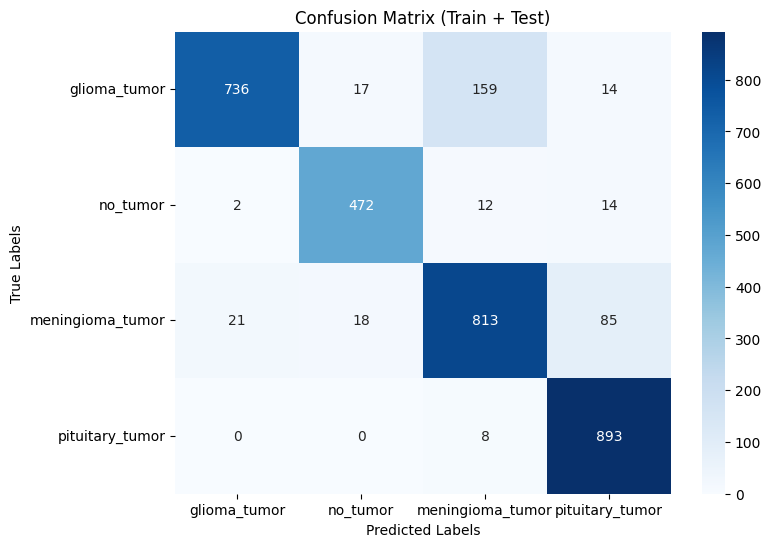

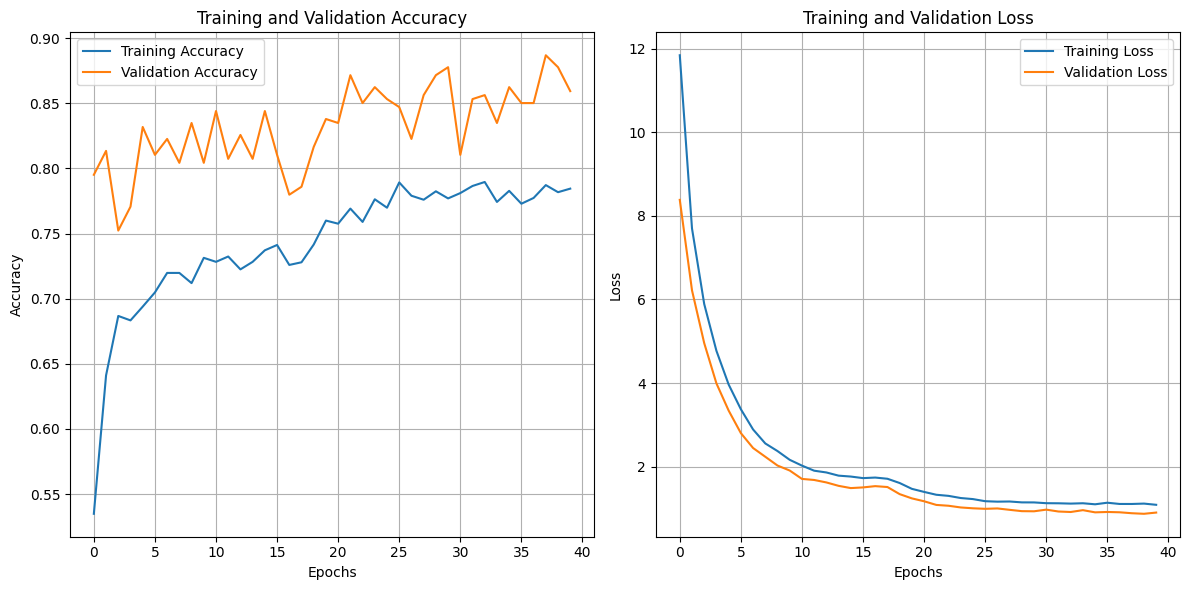

In [ ]:
# Import libraries
from tensorflow.keras.applications import VGG16, MobileNet
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, Dropout, GlobalAveragePooling2D, Concatenate, BatchNormalization
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.regularizers import l2
import tensorflow as tf
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau, ModelCheckpoint
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.model_selection import train_test_split
import numpy as np
import cv2
import os
from tqdm import tqdm
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Dataset paths
TRAIN_PATH = '/content/dataset/Training'
TEST_PATH = '/content/dataset/Testing'
labels = ['glioma_tumor', 'no_tumor', 'meningioma_tumor', 'pituitary_tumor']
X = []
y = []
image_size = 150

# Load the dataset
for label in labels:
    folder_path = os.path.join(TRAIN_PATH, label)
    for img_file in tqdm(os.listdir(folder_path)):
        img = cv2.imread(os.path.join(folder_path, img_file))
        img = cv2.resize(img, (image_size, image_size))
        X.append(img)
        y.append(label)

for label in labels:
    folder_path = os.path.join(TEST_PATH, label)
    for img_file in tqdm(os.listdir(folder_path)):
        img = cv2.imread(os.path.join(folder_path, img_file))
        img = cv2.resize(img, (image_size, image_size))
        X.append(img)
        y.append(label)

X = np.array(X)
y = np.array(y)

# Convert labels to integers
y = np.array([labels.index(label) for label in y])
y = tf.keras.utils.to_categorical(y)

# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=101)

# Data augmentation
datagen = ImageDataGenerator(
    rotation_range=45,
    width_shift_range=0.2,
    height_shift_range=0.2,
    zoom_range=0.3,
    horizontal_flip=True,
    shear_range=0.3,
    fill_mode='nearest'
)
datagen.fit(X_train)

# Load VGG16 and MobileNet base models without top layers
vgg16 = VGG16(weights='imagenet', include_top=False, input_shape=(150, 150, 3))
mobilenet = MobileNet(weights='imagenet', include_top=False, input_shape=(150, 150, 3))

# Fine-tune some layers of both models (Gradual Unfreezing)
for layer in vgg16.layers[:100]:
    layer.trainable = False
for layer in mobilenet.layers[:100]:
    layer.trainable = False

# Extract features from both models
vgg_out = GlobalAveragePooling2D()(vgg16.output)
vgg_out = Dropout(rate=0.5)(vgg_out)  # Increase dropout

mobilenet_out = GlobalAveragePooling2D()(mobilenet.output)
mobilenet_out = Dropout(rate=0.5)(mobilenet_out)  # Increase dropout

# Concatenate the outputs of both models
concatenated = Concatenate()([vgg_out, mobilenet_out])

# Add Dense layers after concatenation with regularization, batch normalization, and dropout
x = Dense(1024, activation="relu", kernel_regularizer=l2(0.01))(concatenated)  # Increased L2 regularization
x = Dropout(0.5)(x)  # Increased dropout
x = BatchNormalization()(x)

x = Dense(256, activation="relu", kernel_regularizer=l2(0.01))(x)  # Increased L2 regularization
x = BatchNormalization()(x)
x = Dropout(0.5)(x)  # Increased dropout

# Output layer with softmax activation (4 classes)
output_layer = Dense(4, activation="softmax")(x)

# Create the final model
model = Model(inputs=[vgg16.input, mobilenet.input], outputs=output_layer)

# Compile the model with Adam optimizer
model.compile(
    optimizer=Adam(learning_rate=0.001),
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

# Define callbacks
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True, min_delta=0.001)
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.3, patience=3, min_lr=1e-6)
checkpoint = ModelCheckpoint("model_best.keras", monitor='val_accuracy', save_best_only=True, verbose=1)

# Train the model using the datagen.flow method
history = model.fit(
    x=[X_train, X_train],
    y=y_train,
    validation_data=([X_test, X_test], y_test),
    epochs=40,
    batch_size=32,
    callbacks=[early_stopping, checkpoint, reduce_lr]
)

# Get predictions for both training and testing sets (combined for classification report and confusion matrix)
train_predictions = model.predict([X_train, X_train])
train_predictions = np.argmax(train_predictions, axis=-1)

train_true_labels = np.argmax(y_train, axis=-1)

test_predictions = model.predict([X_test, X_test])
test_predictions = np.argmax(test_predictions, axis=-1)

test_true_labels = np.argmax(y_test, axis=-1)

# Combine both the predictions and true labels of training and testing data
combined_predictions = np.concatenate([train_predictions, test_predictions])
combined_true_labels = np.concatenate([train_true_labels, test_true_labels])

# Classification report for the combined data (train + test)
print("Classification Report (Train + Test):")
print(classification_report(combined_true_labels, combined_predictions, target_names=labels))

# Confusion matrix for the combined data (train + test)
cm_combined = confusion_matrix(combined_true_labels, combined_predictions)

# Plot confusion matrix for the combined data
plt.figure(figsize=(8, 6))
sns.heatmap(cm_combined, annot=True, fmt='d', cmap='Blues', xticklabels=labels, yticklabels=labels)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix (Train + Test)')
plt.show()

# Plot training and validation accuracy and loss together
plt.figure(figsize=(12, 6))

# Accuracy plot
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.grid()

# Loss plot
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.grid()

plt.tight_layout()
plt.show()
